In [1]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle


In [2]:

# Load cleaned dataset
df = pd.read_excel(r"C:\Users\SUSHIL KUMAR\Desktop\retailsales_analysis\data\Online Retail.xlsx")

In [3]:

# Cleaning (repeat to ensure standalone run)
df = df.dropna(subset=['CustomerID'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']



In [4]:
# --- RFM Feature Engineering ---
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalPrice': 'Monetary'}, inplace=True)

print("RFM Table:")
rfm.head()



RFM Table:


,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


In [5]:
# --- Scale the data ---
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)



In [6]:
# --- KMeans Clustering ---
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)



In [7]:
# Save model
with open(r"C:\Users\SUSHIL KUMAR\Desktop\retailsales_analysis\models\rfm_kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

print("Model Saved: ../models/rfm_kmeans_model.pkl")



Model Saved: ../models/rfm_kmeans_model.pkl


In [8]:
# --- Cluster Analysis ---
cluster_summary = rfm.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)




Cluster Summary:
            Recency  Frequency       Monetary
Cluster                                      
0         43.702685   3.682711    1359.049284
1        248.075914   1.552015     480.617480
2          7.384615  82.538462  127338.313846
3         15.500000  22.333333   12709.090490


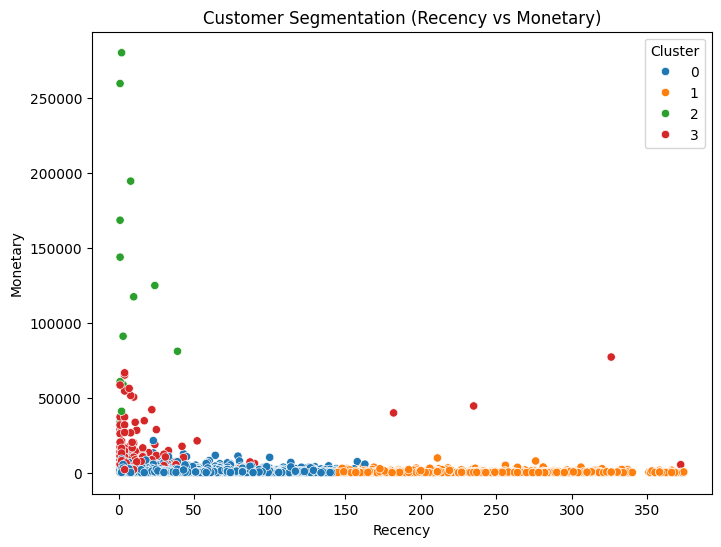

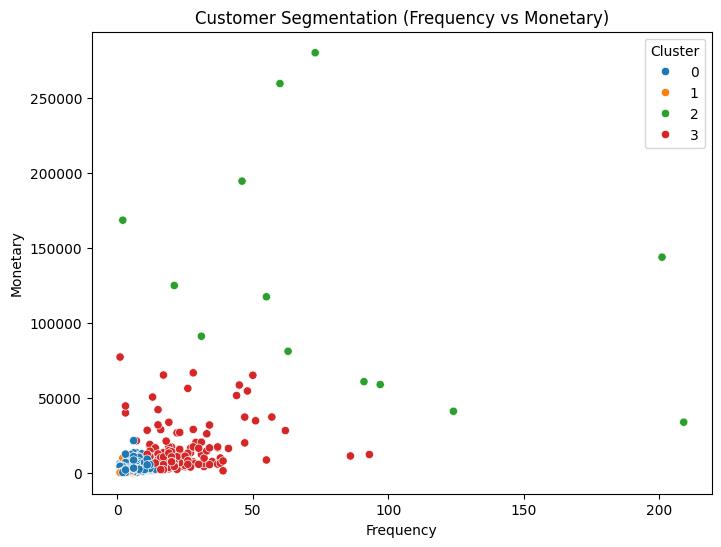

In [9]:
# --- Visualization ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette="tab10")
plt.title("Customer Segmentation (Recency vs Monetary)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=rfm['Frequency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette="tab10")
plt.title("Customer Segmentation (Frequency vs Monetary)")
plt.show()
